![image](https://docs.google.com/uc?export=download&id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d)


<h1><center><b>Regresión Logística para Clasificación Binaria y Análisis de Componentes Principales</b></center></h1>
<h3><center><b>IMÁGENES Y VISIÓN</b></center></h3>




## **Objetivos**<a name="id1"></a>

- Familiarizarse con la regresón logística y sus parámetros.
- Aplicar PCA como técnica de reducción de la dimensión.
- Pensar en un problema de categorías desbalanceadas.

## **Problema**<a name="id2"></a>
- En un dataset de imágenes de lenguaje de señas buscamos clasificar todas las imágenes que pertenezcan a la letra R y a la letra E.

### **Notebook Configuration**

In [ ]:
!shred -u setup_colab.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/ISIS_4825/setup_colab.py" -O setup_colab.py
import setup_colab as setup
setup.setup_workshop_9()


Extracting Zip File...
Deleting File...
Dataset Downloaded Successfully
Workshop 9 Enabled Successfully


## **Importando las librerías necesarias para el laboratorio**<a name="id3"></a>

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import (train_test_split, ShuffleSplit, 
                                     cross_val_score, GridSearchCV)
from sklearn.metrics import (precision_score, recall_score, confusion_matrix, 
                             accuracy_score, f1_score, roc_curve, 
                             precision_recall_curve)
from sklearn.utils import resample

from utils import general as gen

from tqdm.auto import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **Carga de Datos**

In [ ]:
train_dir = gen.create_and_verify("data", "sign_mnist_train.csv")
test_dir = gen.create_and_verify("data", "sign_mnist_test.csv")

In [ ]:
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

In [ ]:
full_X_train, full_y_train = train_data.drop(columns=["label"]), train_data["label"]
X_test, y_test = test_data.drop(columns=["label"]), test_data["label"]

In [ ]:
if (full_y_train == 9).sum() == 0 or (y_test == 9).sum() == 0:
    full_y_train = full_y_train.apply(lambda x: x - 1 if x > 8 else x)
    y_test = y_test.apply(lambda x: x - 1 if x > 8 else x)

In [ ]:
if train_data.query("label==9").size == 0 or test_data.query("label==9").size == 0:
    train_data["label"] = train_data["label"].apply(lambda x: x - 1 if x > 8 else x)
    test_data["label"] = test_data["label"].apply(lambda x: x - 1 if x > 8 else x)

In [ ]:
full_X_train.shape, full_y_train.shape

((27455, 784), (27455,))

In [ ]:
X_test.shape, y_test.shape

((7172, 784), (7172,))

## **Preparación de los Datos**

In [ ]:
random_sample22 = full_X_train.sample(1, random_state=5678)
sample_target22 = full_y_train[random_sample22.index].values

In [ ]:
train_data_a22 = train_data.query("(label==4) | (label==16)")
test_data_a22 = test_data.query("(label==4) | (label==16)")

In [ ]:
full_X_train22, full_y_train22 = train_data_a22.drop(columns=["label"]), train_data_a22["label"]
X_test22, y_test22 = test_data_a22.drop(columns=["label"]), test_data_a22["label"]

In [ ]:
full_y_train22 = (full_y_train22 == 4).astype("uint8")
y_test22 = (y_test22 == 4).astype("uint8")

## **Train Set, Validation Set, Test Set**

In [ ]:
X_train22, X_val22, y_train22, y_val22 = train_test_split(full_X_train22,
                                                  full_y_train22,
                                                  test_size=0.2,
                                                  random_state=1234)

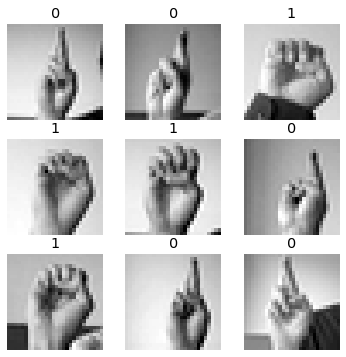

In [ ]:
random_sample22 = X_train22.sample(9, random_state=1234)
gen.visualize_subplot(
    random_sample22.values.reshape(-1, 28, 28),
    y_train22[random_sample22.index].values, (3, 3), (6, 6))

## **Desbalanceo de clases**

In [ ]:
def cat_frequencies(labels):
    freq_p = labels.mean()
    freq_n = 1 - freq_p
    return freq_p, freq_n

In [ ]:
f_p, f_n = cat_frequencies(y_train22)

In [ ]:
total22 = pd.concat([X_train22, y_train22], axis=1)

In [ ]:
neg_class22 = total22.query("label==0")
pos_class22 = total22.query("label==1")

In [ ]:
neg_class_downsampled22 = resample(neg_class22, replace=False,
                                 n_samples=len(pos_class22), 
                                 random_state=1234)

In [ ]:
balanced_data22 = pd.concat([neg_class_downsampled22, pos_class22])

In [ ]:
y_train22 = balanced_data22["label"]
X_train22 = balanced_data22.drop("label", axis=1)

In [ ]:
f_p, f_n = cat_frequencies(y_train22)

## **Modelamiento**

In [ ]:
log_reg22 = LogisticRegression(n_jobs=-1)

In [ ]:
log_reg22.fit(X_train22, y_train22)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Predicción**

In [ ]:
random_sample22 = X_test22.sample(9, random_state=1234)
y_pred22 = log_reg22.predict(random_sample22)

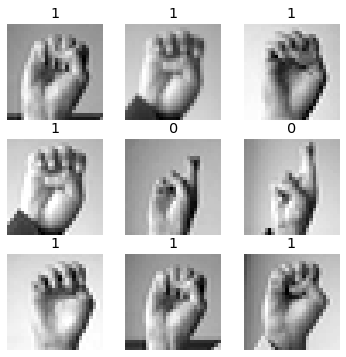

In [ ]:
gen.visualize_subplot(
    random_sample22.values.reshape(-1, 28, 28),
    y_pred22, (3, 3), (6, 6)
)

## **Validación**

In [ ]:
y_pred22 = log_reg22.predict(X_test22)

In [ ]:
conf_matrix22 = confusion_matrix(y_test22, y_pred22)
pd.DataFrame(conf_matrix22)

,0,1
0,144,0
1,0,498


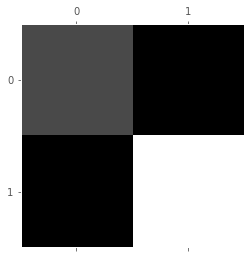

In [ ]:
plt.matshow(conf_matrix22, cmap="gray")
plt.grid(0)
plt.show()

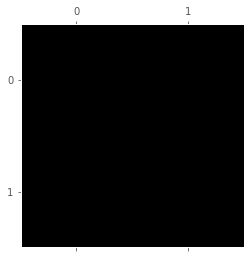

In [ ]:
norm_conf_mat22 = conf_matrix22 / conf_matrix22.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat22, 0)
plt.matshow(norm_conf_mat22, cmap="gray")
plt.grid(0)
plt.show()

In [ ]:
accuracy_score(y_test22, y_pred22)

1.0

In [ ]:
recall_score(y_test22, y_pred22)

1.0

In [ ]:
precision_score(y_test22, y_pred22)

1.0

In [ ]:
cross_val_score(log_reg22, full_X_train22, full_y_train22, cv=4, scoring="accuracy")

array([1., 1., 1., 1.])

## **Trabajo Asíncrono**<a name="id9"></a>
1. En primera instancia, utilizar [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para determinar los mejores valores de los hiperparámetros. Para eso, averiguar sobre los siguientes hiperparámetros:

    - `penalty: 'l1' y 'l2'`
    - `C`
    - `solver: 'saga', 'liblinear'`
2. Luego, realizar una clasificación multiclase sobre este mismo dataset y con las clases desde la 'A' hasta la 'K'. Revisar la documentación de la regresión logística [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
3. Por último, aplicar [PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales) para construir un conjunto de datos de dimensión reducida para el problema multiclase del punto 2. Comparar los resultados con base en las métricas de clasificación sobre el conjunto de test. Para lo anterior, se puede hacer uso de la clase [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de `scikit-learn`

## **Punto 1 - GridSearch**

Para encontrar los mejores hiperparametros con nuestra función gridSearch() se evaluo:


*   C: hace alución a la fuerza de regularización, se debe especificar como un valor positivo en donde entre mas pequeño seal el valor quiere decir que se tiene una regularización mucho mas fuerte.

*   penalty L1 y L2 en donde la diferencia radica en que las rtenicas de laso reducen el coeficiente de la entidad menos importante a cero, mientras que la regresion L2 añade una amgnitud cuadrada al termino que se desea penalizar.






In [ ]:
grid_values = {'penalty': [ 'l2','l1'],'C':[0.001,.009,0.01,.09,1,5,10,25],'tol':[0.001],'solver':['saga','liblinear'],'max_iter':[10000]}

In [ ]:
clf = LogisticRegression()
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, )
grid_clf_acc.fit(X_train22, y_train22)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'max_iter': [10000], 'penalty': ['l2', 'l1'],
                         'solver': ['saga', 'liblinear'], 'tol': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

A continuación, se puede ver los hyperparámetros mejor modelo o clasificador encontrado:

In [ ]:
grid_clf_acc.best_params_

{'C': 0.001,
 'max_iter': 10000,
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.001}

In [ ]:
grid_clf_acc.best_score_

1.0

In [ ]:
y_pred22 =grid_clf_acc.predict(X_test22)


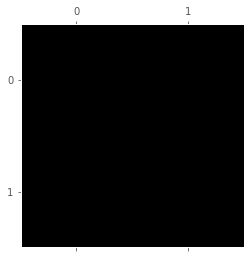

In [ ]:
conf_matrix22 = confusion_matrix(y_test22, y_pred22)
pd.DataFrame(conf_matrix22)
norm_conf_mat22 = conf_matrix22 / conf_matrix22.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat22, 0)
plt.matshow(norm_conf_mat22, cmap="gray")
plt.grid(0)
plt.show()

## **Punto 2 - Clasificación Multiclase**

## **Visualización y Análisis Exploratorio**<a name="id4"></a>
- En este laboratorio vamos a usar una variación del dataset de MNIST que utiliza imágenes de lenguaje de señas. Cada número, desde el 0 hasta el 23, será asignado a cada seña.

![image](https://docs.google.com/uc?export=download&id=17e0VoyKW_0HgmItDWqGiyB1Bl6C-e8G8)

- Este dataset consta de 7172 imágenes en total con clases madianamente balanceadas.

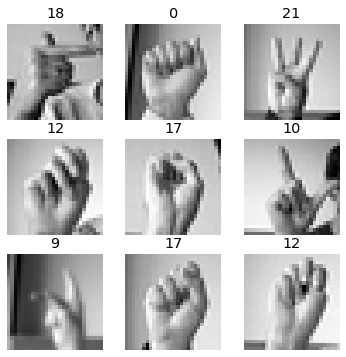

In [ ]:
random_sample = full_X_train.sample(9, random_state=1234)
gen.visualize_subplot(
    random_sample.values.reshape(-1, 28, 28),
    full_y_train[random_sample.index].values, (3, 3), (6, 6)
)

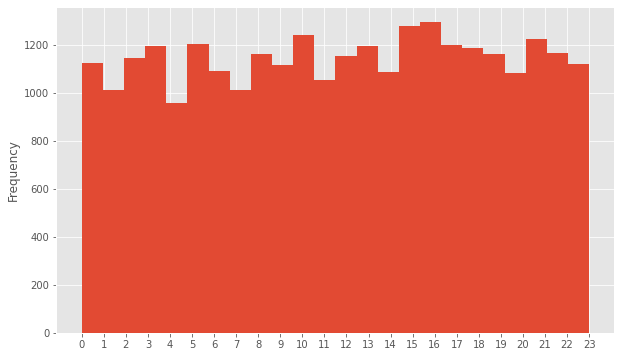

In [ ]:
plt.figure(figsize=(10, 6))
ax = full_y_train.plot(kind="hist", bins=24)
ax.set_xticks(range(24))
plt.show()

In [ ]:
full_y_train.value_counts().sort_index()

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
9     1114
10    1241
11    1055
12    1151
13    1196
14    1088
15    1279
16    1294
17    1199
18    1186
19    1161
20    1082
21    1225
22    1164
23    1118
Name: label, dtype: int64

## **Preparación de los Datos**<a name="id5"></a>

Debido a que se desea hacer una clasificación multiclase sobre el dataset ***sign_mnist*** para que nuestro modelo sea capaz de predecir las clases de la A a la K dependiendo de la imagen de entrada. Se procedio a preparar los datos partiende el dataset solo en nuesras clases de interes.


In [ ]:
random_sample = full_X_train.sample(1, random_state=5678)
sample_target = full_y_train[random_sample.index].values

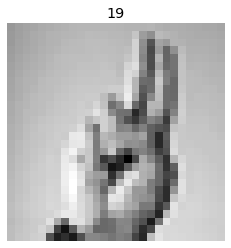

In [ ]:
gen.imshow(random_sample.values.reshape(28, 28), color=False, 
           title=sample_target[0])

In [ ]:
train_data_a = train_data.query("(label==0) | (label==1) | (label==2) | (label==3) |(label==4) |(label==5) |(label==6) |(label==7) |(label==8) |(label==9) ")
test_data_a = test_data.query("(label==0) | (label==1) | (label==2) | (label==3) |(label==4) |(label==5) |(label==6) |(label==7) |(label==8) |(label==9) ")

In [ ]:
full_X_trainF, full_y_trainF = train_data_a.drop(columns=["label"]), train_data_a["label"]
X_testF, y_testF = test_data_a.drop(columns=["label"]), test_data_a["label"]

In [ ]:
full_y_trainF.value_counts().sort_index()

0    1126
1    1010
2    1144
3    1196
4     957
5    1204
6    1090
7    1013
8    1162
9    1114
Name: label, dtype: int64

### **Train Set, Validation Set, Test Set**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(full_X_trainF,
                                                  full_y_trainF,
                                                  test_size=0.2,
                                                  random_state=1234)

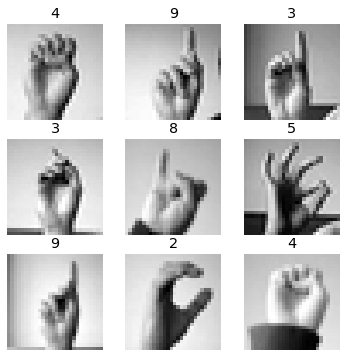

In [ ]:
random_sample = X_train.sample(9, random_state=1234)
gen.visualize_subplot(
    random_sample.values.reshape(-1, 28, 28),
    y_train[random_sample.index].values, (3, 3), (6, 6)
)

### **Desbalanceo de Clases**
- Algo muy usual dentro de los problemas de clasificación binaria es el desbalanceo de clases. Esto implicará que nuestro algoritmo probablemente clasificará la clase mayoritaria, lo cual no debería ser.

$$\text{freq}_p = \frac{\text{Número de instancias positivas}}{\text{Total de instancias}}$$

$$\text{freq}_n = \frac{\text{Número de instancias negativas}}{\text{Total de instancias}}$$

- En este caso, vamos a usar un método de la librería `Scikit-Learn` llamado `resample`. Esta función nos va a permitir hacer un remuestreo de la clase con mayor cantidad de instancias, para que tenga igual número de muestras que la clase con menor cantidad de instancias.

In [ ]:
y_train.value_counts().sort_index()

0    894
1    801
2    933
3    962
4    750
5    955
6    880
7    810
8    927
9    900
Name: label, dtype: int64

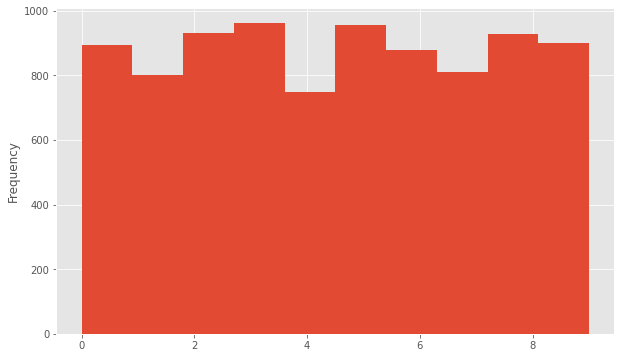

In [ ]:
plt.figure(figsize=(10, 6))
y_train.astype("int").plot(kind="hist")
plt.show()

Como se puede apreciar en el histograma de arriba la clase 4 es aquella que presenta un menor numero de muestras. Por lo cual para poder balancear nuestro problema, se procede a hacer un resample de las otras clases de manera aleatoria con el fin de que al final todas las clases tengan la misma cantidad de muestras.

In [ ]:
total = pd.concat([X_train, y_train], axis=1)

pos_class = total.query("label==4")

neg_class = total.query("label==0")
neg_class_downsampled0 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==1")
neg_class_downsampled1 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)


neg_class = total.query("label==2")
neg_class_downsampled2 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==3")
neg_class_downsampled3 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==5")
neg_class_downsampled5 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==6")
neg_class_downsampled6 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==7")
neg_class_downsampled7 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==8")
neg_class_downsampled8 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)

neg_class = total.query("label==9")
neg_class_downsampled9 = resample(neg_class, replace=False,
                                 n_samples=len(pos_class), 
                                 random_state=1234)



In [ ]:
balanced_data = pd.concat([neg_class_downsampled0, neg_class_downsampled1, neg_class_downsampled2, neg_class_downsampled3,pos_class, neg_class_downsampled5, neg_class_downsampled6, neg_class_downsampled7, neg_class_downsampled8, neg_class_downsampled9 ])

In [ ]:
y_train = balanced_data["label"]
X_train = balanced_data.drop("label", axis=1)

In [ ]:
y_train.value_counts().sort_index()

0    750
1    750
2    750
3    750
4    750
5    750
6    750
7    750
8    750
9    750
Name: label, dtype: int64

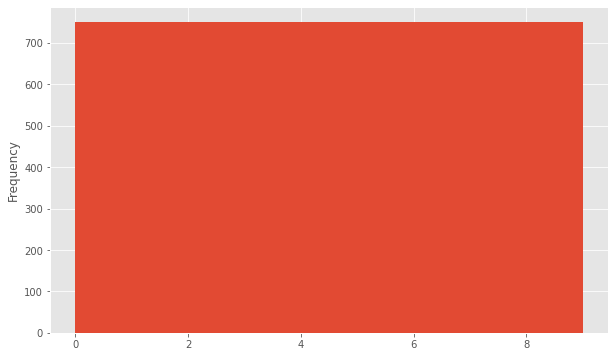

In [ ]:
plt.figure(figsize=(10, 6))
y_train.astype("int").plot(kind="hist")
plt.show()

## **Modelamiento**<a name="id6"></a>
- En esta ocasión se hará uso de la regresión Logística, una función lineal ampliamente usada en problemas de clasificación binaria.

$$\text{sigmoid}(x)=\frac{1}{1+e^{-x}}$$

Pero debido a que en este caso no estamos realizando una clasificación binaria sino multiclase se implementa una estrategia conocida como one vs all en donde se va a entrenar un clasificador binario para cada clase y al final aquel clasificador que tenga la probabilidad o predicción mal alta determinara la clase de la imagen de entrada.

In [ ]:
clf = LogisticRegression(penalty='none', 
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(X_train, y_train)

#to check the shape of the coefficient matrix
clf.coef_.shape

(10, 784)

## **Predicción**<a name="id7"></a>

Con el fin de evidenciar mejor como esta funcionando nuestro clasificador, podemos ver cuales son los coeficientes de cada clase que tienen un mayor peso. Esto se traduce en cuales son los píxeles mas relevantes para determinar la clase a la que corresponde cada imagen. (los píxeles mas relevantes se muestran de color rojo)

In [ ]:
yS=full_y_train.value_counts().sort_index()
classes = ['A', 'B', 'C','D', 'E','F', 'G', 'H', 'I', 'K']
nclasses = len(classes)

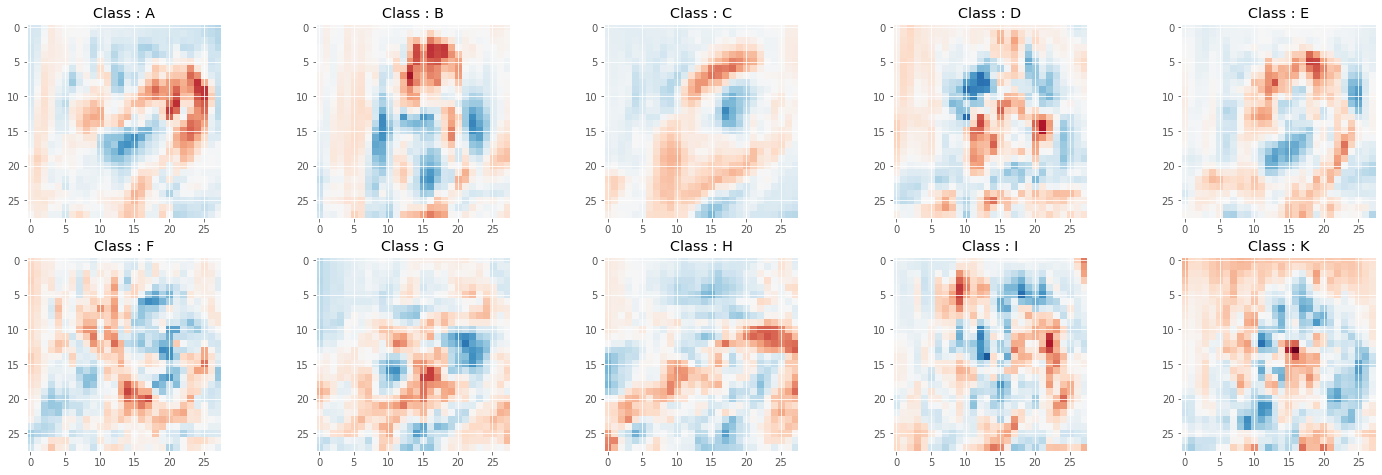

In [ ]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 25));

for i in range(nclasses):
    p = plt.subplot(6, 5, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
 
    p = plt.title('Class : ' + classes[i] );

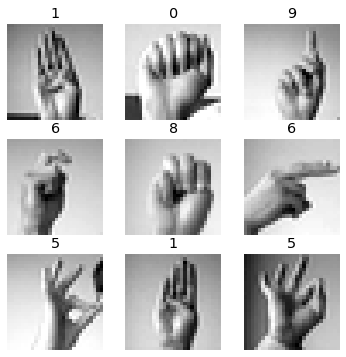

In [ ]:
random_sample2 = X_test.sample(9, random_state=1234)
y_pred2 = clf.predict(random_sample2)

gen.visualize_subplot(
    random_sample2.values.reshape(-1, 28, 28),
    y_pred2, (3, 3), (6, 6)
)

## **Validación**<a name="id8"></a>

Por ultimo, se procedio a evaluar el desemepeño de nuestro clasificador. 

In [ ]:
y_predF = clf.predict(X_testF)

In [ ]:
conf_matrix = confusion_matrix(y_testF, y_predF)

In [ ]:
pd.DataFrame(conf_matrix)

,0,1,2,3,4,5,6,7,8,9
0,331,0,0,0,0,0,0,0,0,0
1,0,410,0,1,0,0,0,0,0,21
2,0,0,289,0,0,21,0,0,0,0
3,0,0,0,239,0,0,0,0,6,0
4,0,0,0,0,498,0,0,0,0,0
5,0,0,21,0,0,226,0,0,0,0
6,0,0,0,0,0,0,313,23,12,0
7,0,0,0,0,21,0,62,353,0,0
8,0,0,0,0,0,1,0,21,241,25
9,0,0,0,20,0,21,0,0,43,247


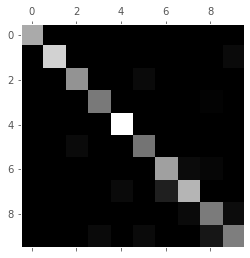

In [ ]:
plt.matshow(conf_matrix, cmap="gray")
plt.grid(0)
plt.show()

In [ ]:
norm_conf_mat = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat, 0)

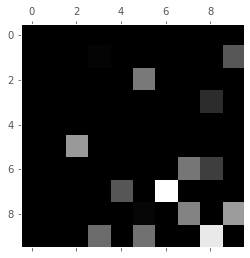

In [ ]:
plt.matshow(norm_conf_mat, cmap="gray")
plt.grid(0)
plt.show()

In [ ]:

accuracy2 = accuracy_score(y_testF, y_predF)
print((accuracy2))


0.9079630698211194


Como se puede ver se obtuvo un buen desempeño por parte de nuestro clasificador bajo el criterio accuracy score (aprox 90%), el cual se encarga de evaluar la precisión de cada una de nuestras clases. Con la matriz de confusión podemos ver que que la maor cantidad de errores de predicción se dieron en la clase 7 la cual fue etiquetada erroneamente como la clase 6. Este, no es un comportamiento dificil de entender por que como se puede ver en la seña de la letra G y la letra H son parecidas.

## **Punto 3 - Clasificación Multiclase PCA**

Una de las técnicas mas eficientes para acelerar el **"fitting"** de los algoritmos de machine learning consiste en n realizar el analisis de componentes principales. En este caso se mantubo el 95% de la varianza original de los datos y se realizó el mismo procedimiento de entrenamiento.

In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_testF)

In [ ]:

pca = PCA(.95)

In [ ]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
clf2 = LogisticRegression(penalty='none', 
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(train_img, y_train)

In [ ]:
y_predF2 = clf2.predict(test_img)

In [ ]:

accuracy2 = accuracy_score(y_testF, y_predF2)
print(accuracy2)

0.8831506058857472
0.8831506058857472


Notando al final que se llegó a un score o precisión final del 88% frente a un 90% cuando se realizó la clasificación multiclases sin realizar el PCA, en este caso hubo una reducción del 2% pero se mantuvo el 95% de varianca original en el numero de componentes originales. Algo que a su ves permite agilizar el proceso de entrenamiento del módelo. A continuación se pueden ver otras estadisticas de desempeño del modelo obtenido a traves de PCA como la matriz de confusión. 

In [ ]:
conf_matrix = confusion_matrix(y_testF, y_predF2)

In [ ]:
pd.DataFrame(conf_matrix)

,0,1,2,3,4,5,6,7,8,9
0,331,0,0,0,0,0,0,0,0,0
1,0,400,0,11,0,0,0,0,0,21
2,0,0,289,0,0,21,0,0,0,0
3,0,0,0,231,0,13,0,0,1,0
4,0,0,0,0,498,0,0,0,0,0
5,0,0,21,0,0,226,0,0,0,0
6,0,0,0,0,0,0,271,40,37,0
7,0,0,0,0,21,0,91,324,0,0
8,0,0,0,0,0,32,0,7,228,21
9,0,0,0,7,0,39,0,21,1,263


In [ ]:
norm_conf_mat = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat, 0)

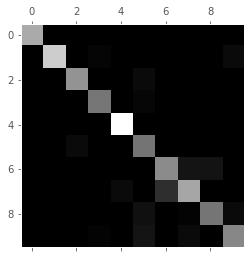

In [ ]:
plt.matshow(conf_matrix, cmap="gray")
plt.grid(0)
plt.show()

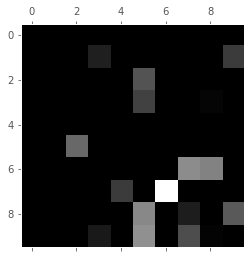

In [ ]:
plt.matshow(norm_conf_mat, cmap="gray")
plt.grid(0)
plt.show()